In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

#**DataSet**

Estimation of obesity levels based on eating habits and physical condition.

[link al dataset](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

In [2]:
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
obesity_habits_physical_features = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = obesity_habits_physical_features.data.features
y = obesity_habits_physical_features.data.targets

# metadata
print(obesity_habits_physical_features.metadata)

# variable information
print(obesity_habits_physical_features.variables)

{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

#**EDA and Preprocessing**

In [3]:
print(y.NObeyesdad.value_counts())
y.info()
# non nulls

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NObeyesdad  2111 non-null   object
dtypes: object(1)
memory usage: 16.6+ KB


In [4]:
# y grouped for future visualization
y.insert(1,'NObes_Group', 'Normal')
y.loc[(y.NObeyesdad == 'Insufficient_Weight'), 'NObes_Group'] = 'Underweight'
y.loc[(y.NObeyesdad == 'Overweight_Level_I') | (y.NObeyesdad == 'Overweight_Level_II'),'NObes_Group'] = 'Overweight'
y.loc[(y.NObeyesdad == 'Obesity_Type_I') | (y.NObeyesdad == 'Obesity_Type_II') | (y.NObeyesdad == 'Obesity_Type_III'),'NObes_Group'] = 'Obesity'

In [5]:
print(y.value_counts())
print(y.NObes_Group.value_counts())
y.info()
# non nulls

NObeyesdad           NObes_Group
Obesity_Type_I       Obesity        351
Obesity_Type_III     Obesity        324
Obesity_Type_II      Obesity        297
Overweight_Level_I   Overweight     290
Overweight_Level_II  Overweight     290
Normal_Weight        Normal         287
Insufficient_Weight  Underweight    272
dtype: int64
Obesity        972
Overweight     580
Normal         287
Underweight    272
Name: NObes_Group, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NObeyesdad   2111 non-null   object
 1   NObes_Group  2111 non-null   object
dtypes: object(2)
memory usage: 33.1+ KB


In [6]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [7]:
X.describe(include='all').T
# non nulls

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,2111,2,Male,1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,2111.0,NaN,NaN,NaN,24.3126,6.345968,14.0,19.947192,22.77789,26.0,61.0
Height,2111.0,NaN,NaN,NaN,1.701677,0.093305,1.45,1.63,1.700499,1.768464,1.98
Weight,2111.0,NaN,NaN,NaN,86.586058,26.191172,39.0,65.473343,83.0,107.430682,173.0
family_history_with_overweight,2111,2,yes,1726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAVC,2111,2,yes,1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCVC,2111.0,NaN,NaN,NaN,2.419043,0.533927,1.0,2.0,2.385502,3.0,3.0
NCP,2111.0,NaN,NaN,NaN,2.685628,0.778039,1.0,2.658738,3.0,3.0,4.0
CAEC,2111,4,Sometimes,1765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMOKE,2111,2,no,2067,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Continuos Variables:* Age, Height, Weight, FCVC, NCP, CH2O, FAF and TUE.

*Categorical Variables:* Gender, family_history_with_overweight, FAVC, SMOKE, SCC and MTRANS.

*Categorical-Ordinal Variables:* CAEC and CALC.

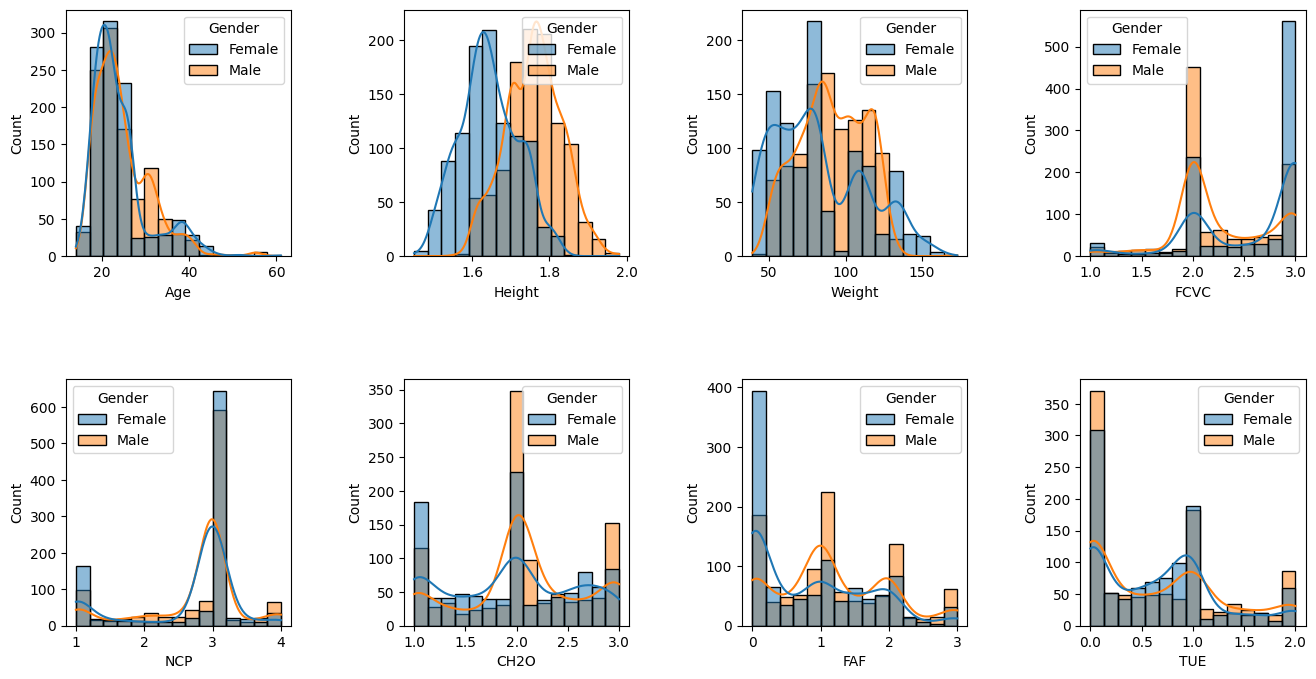

In [8]:
plt.figure(1 , figsize = (16 , 8))
n = 0
for x in ['Age' , 'Height' , 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']:
    n += 1
    plt.subplot(2, 4, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(X, x=X[x], bins = 15, hue='Gender', kde=True)
plt.show()

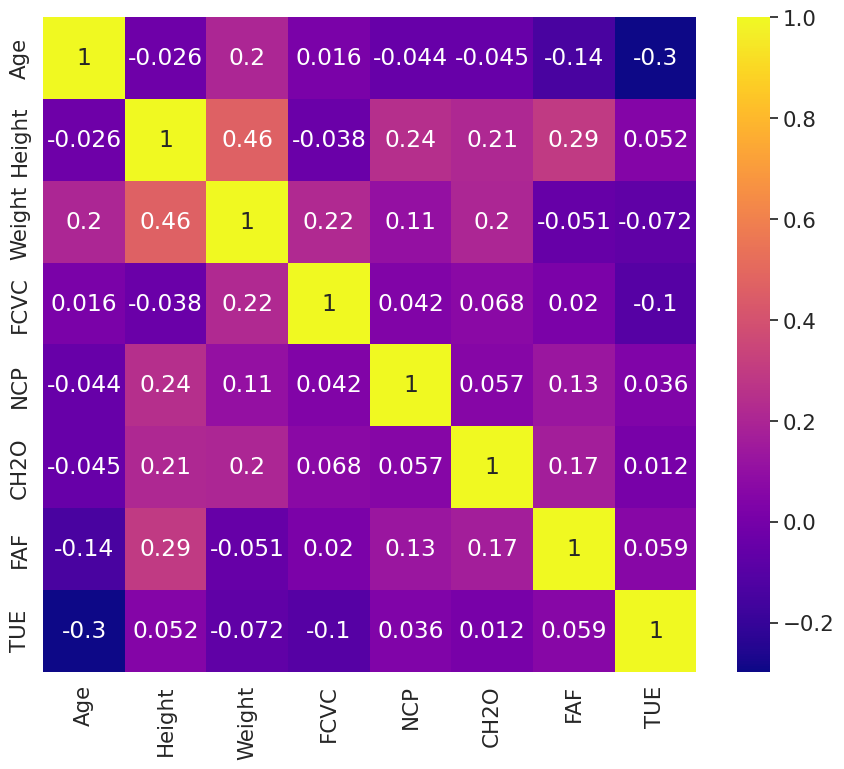

In [9]:
# No strong correlations

sns.set(font_scale=1.4)
plt.figure(figsize=(9,8))
sns.heatmap(X.corr(numeric_only=True), annot=True, cmap='plasma')
plt.tight_layout()
plt.show()

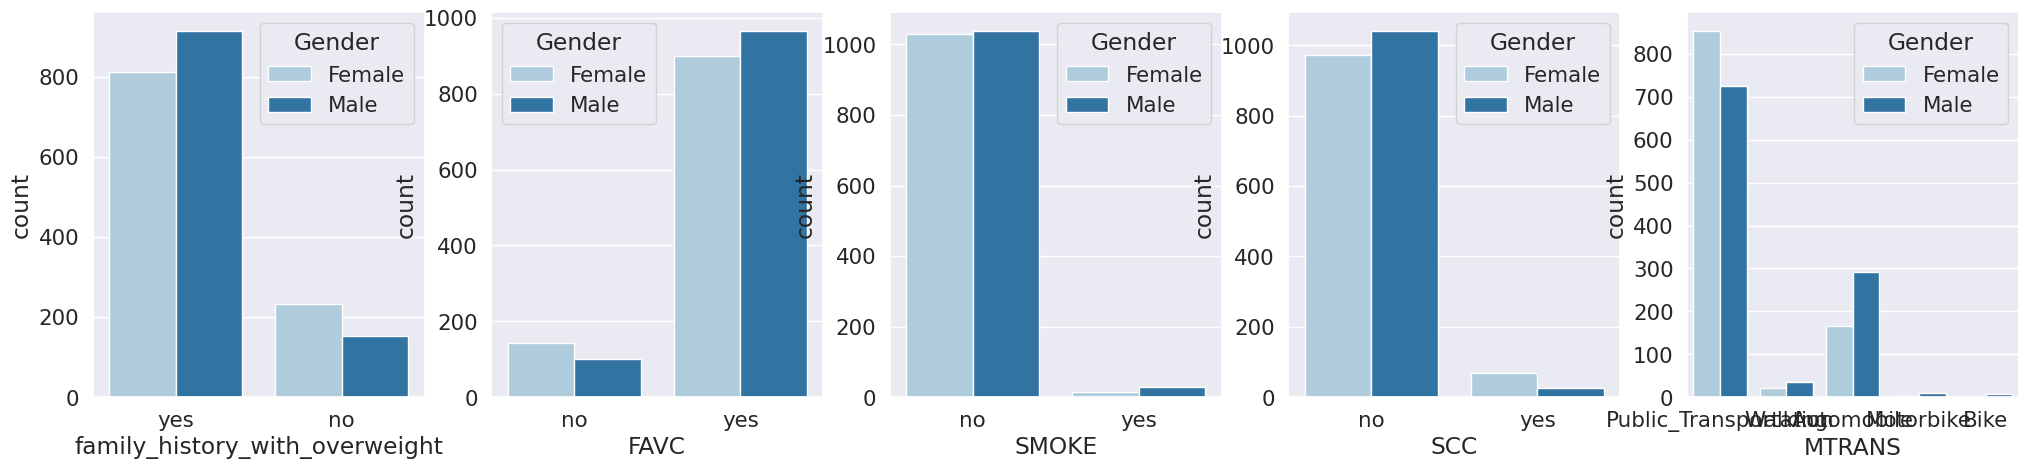

In [10]:
plt.figure(1 , figsize = (30, 5))
n = 0
for x in ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']:
    n += 1
    plt.subplot(1, 6, n)
    plt.subplots_adjust()
    sns.countplot(X, x=X[x], hue='Gender', palette='Paired')
plt.show()



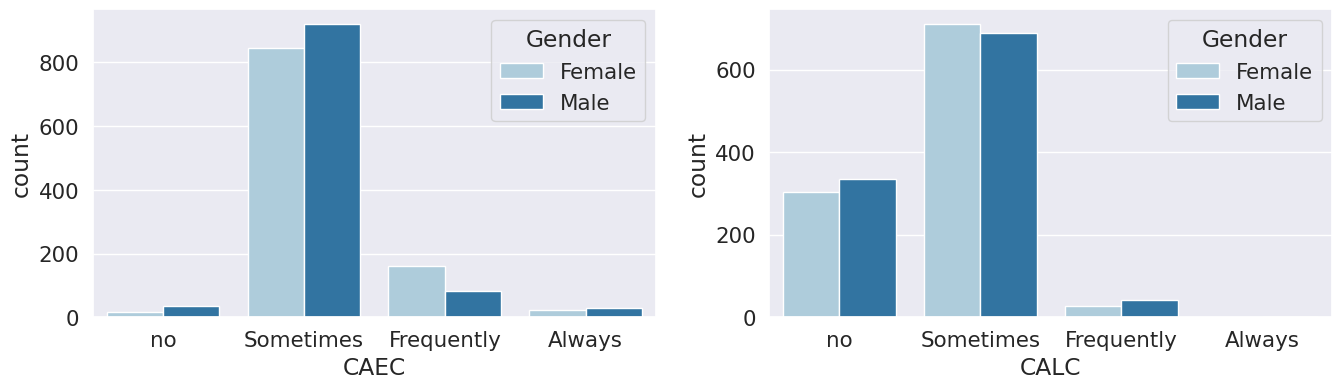

In [11]:
plt.figure(1 , figsize = (16, 4))
n = 0
for x in ['CAEC', 'CALC']:
    n += 1
    plt.subplot(1, 2, n)
    plt.subplots_adjust()
    sns.countplot(X, x=X[x], hue='Gender', order=['no', 'Sometimes', 'Frequently', 'Always'], palette='Paired')
plt.show()


In [12]:
# Scaling

from math import remainder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

X_trans = X
for x in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']:
  X_trans[x] = LabelEncoder().fit_transform(X_trans[x])

X_trans.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


#**K-Means**

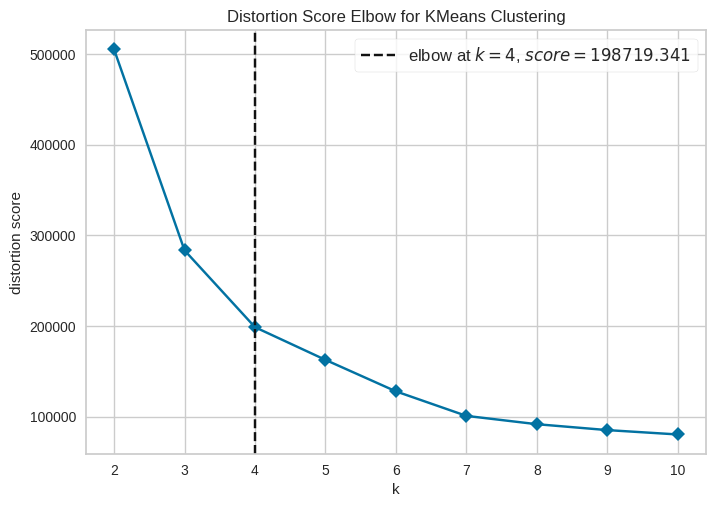

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# Optimum number of clusters Elbow Method

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans_test = KMeans(init='k-means++', random_state=8, n_init='auto') # k-means++ centroid selection data-based
visualizer = KElbowVisualizer(kmeans_test, k=(2,11), metric ='distortion', timings=False)

visualizer.fit(X_trans)
visualizer.show()

The  break in the chart indicates that the Elbow method detects 4 as the optimum number of clusters.

For n_clusters = 2 The average silhouette_score is: 0.5677367822428903
For n_clusters = 3 The average silhouette_score is: 0.5005126385469671
For n_clusters = 4 The average silhouette_score is: 0.47157414165217454
For n_clusters = 5 The average silhouette_score is: 0.46188365756218147
For n_clusters = 6 The average silhouette_score is: 0.44923756985694563
For n_clusters = 7 The average silhouette_score is: 0.4410047101320417
For n_clusters = 8 The average silhouette_score is: 0.402377556551269


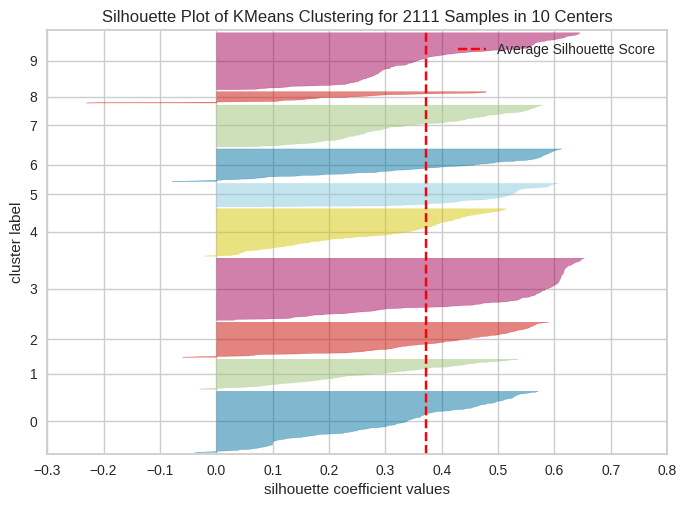

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2111 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [14]:
# Optimum number of clusters Silhouette Method

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    clusterer = KMeans(init='k-means++', n_clusters=n_clusters, random_state=8, n_init='auto')
    cluster_labels = clusterer.fit_predict(X_trans)

    silhouette_avg = silhouette_score(X_trans, cluster_labels)
    print('For n_clusters =', n_clusters, 'The average silhouette_score is:', silhouette_avg)

visualizer = SilhouetteVisualizer(kmeans_test, colors='yellowbrick')
visualizer.fit(X_trans)
visualizer.show()

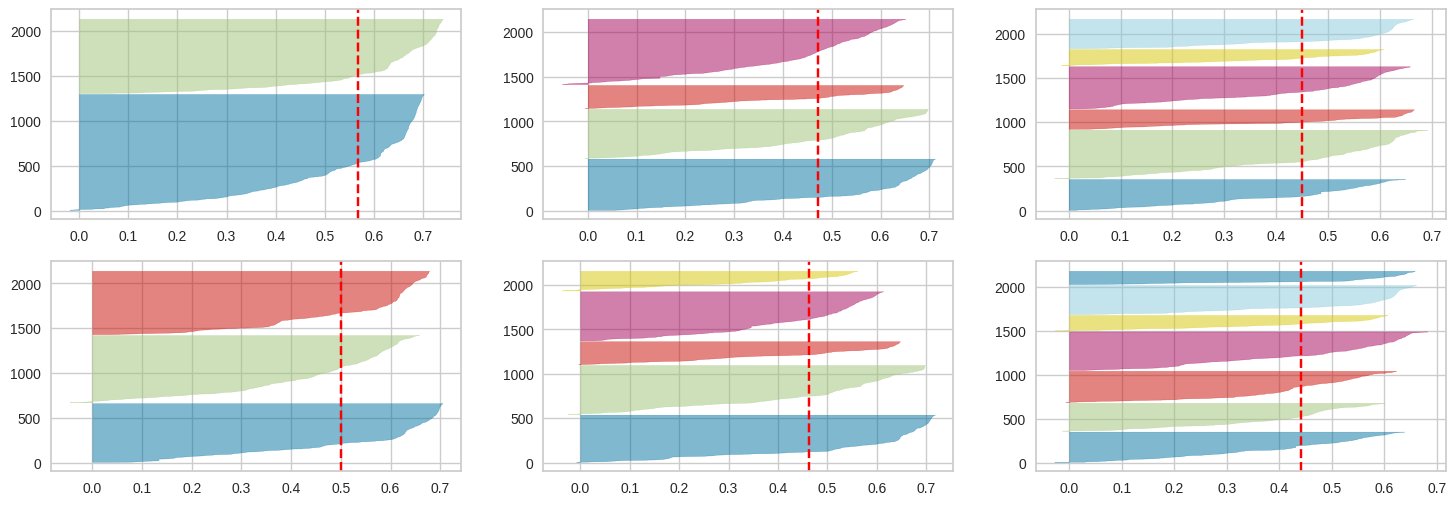

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(18,6))
for i in range(2,8):
    kmeans_test = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=8)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(kmeans_test, colors='yellowbrick', ax=ax[mod][q-1])
    visualizer.fit(X_trans)

The Silhouette plot shows that with cluster values between 2 and 8 (detected *a priori*) all the clusters have a Silhouette score greater than the average score (red-dotted line). However, there shouldn’t be wide fluctuations in the size of the clusters (width of clusters represents number of data points). Wide fluctuations in the size of the silhouette plots start appearing for n_clusters >= 4.

All togheter, 3 (Silhouette method) and 4 (Elbow method) k values will be explored.

In [16]:
# KMeans

kmeans = KMeans(n_clusters = 3, init ='k-means++', random_state=8, n_init='auto')
y_kmeans = kmeans.fit_predict(X_trans)
y_kmeans = pd.DataFrame(y_kmeans)

# PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_3D = pca.fit_transform(X_trans)
X_3D = pd.DataFrame(X_3D)
X_3D['cluster3'] = y_kmeans
X_3D.columns = ['PC-1', 'PC-2', 'PC-3', 'cluster3']

fig = px.scatter_3d(X_3D, x='PC-1', y='PC-2', z='PC-3', color='cluster3')
fig.show()

In [17]:
# KMeans

kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=8, n_init='auto')
y_kmeans = kmeans.fit_predict(X_trans)
y_kmeans = pd.DataFrame(y_kmeans)

X_3D['cluster4'] = y_kmeans
X_3D.columns = ['PC-1', 'PC-2', 'PC-3', 'cluster3', 'cluster4']

fig = px.scatter_3d(X_3D, x='PC-1', y='PC-2', z='PC-3', color='cluster4')
fig.show()



<Axes: xlabel='Weight', ylabel='Height'>

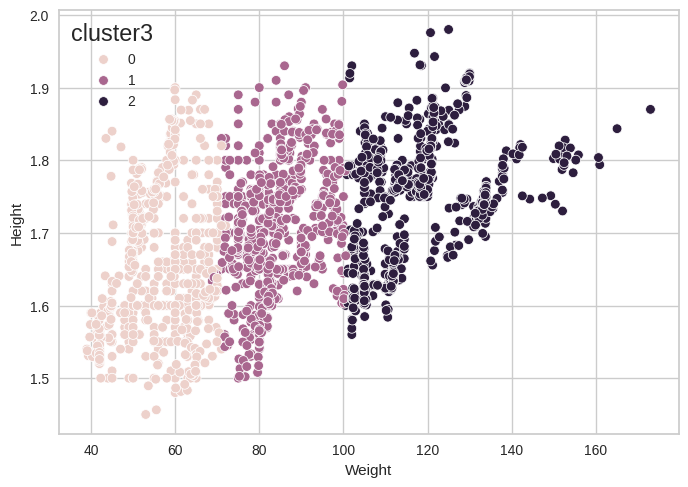

In [18]:
X_kmeans = X_trans
X_kmeans['cluster3'] = X_3D['cluster3']
X_kmeans['cluster4'] = X_3D['cluster4']
X_kmeans['groups'] = y['NObes_Group']

sns.scatterplot(X_kmeans, y='Height', x='Weight', hue='cluster3')


<Axes: xlabel='Weight', ylabel='Height'>

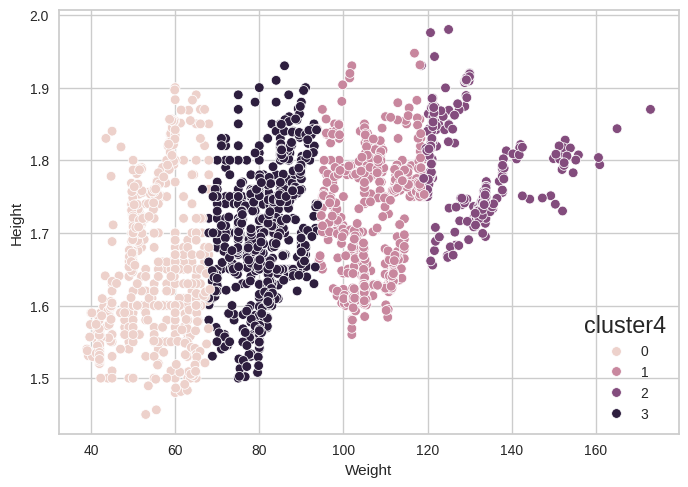

In [19]:
sns.scatterplot(X_kmeans, y='Height', x='Weight', hue='cluster4')

<Axes: xlabel='groups', ylabel='Weight'>

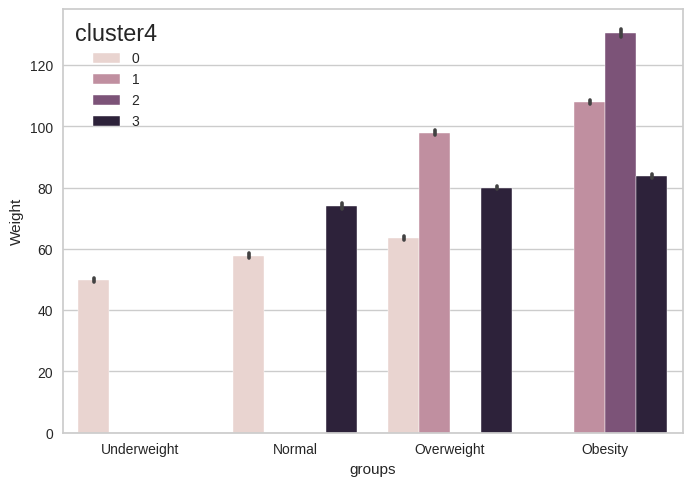

In [20]:
sns.barplot(X_kmeans, x='groups', y='Weight', hue='cluster4', order=['Underweight','Normal','Overweight','Obesity'])

In [21]:
X_trans.drop(columns=['cluster3','cluster4','groups'], inplace=True)

Using the K-Means method it has been possible to detect independent clusters that seem to be related to weight but encompass additional information. They do not exactly reflect the weight categories and for the case of k=4 they overlap in the same, perhaps related to the information they encompass and the continuum of the biologic variables they represent.

#**Hierarchical Clustering**

**Complete & Euclidean**

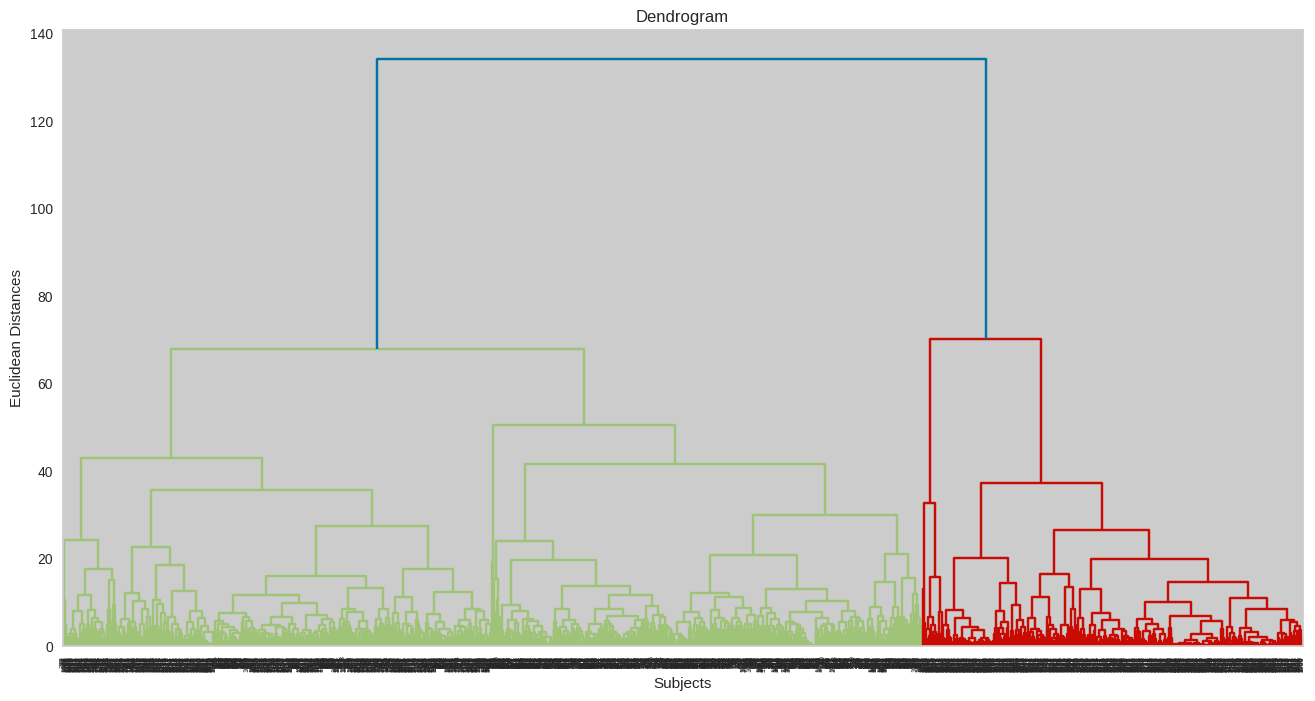

In [22]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(X_trans, method='complete', metric='euclidean'))

plt.title('Dendrogram')
plt.xlabel('Subjects')
plt.ylabel('Euclidean Distances')
plt.show()

In [23]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')

y_hc = hc.fit_predict(X_trans)
y_hc = pd.DataFrame(y_hc)

X_3D['cluster_hc_eu_co'] = y_kmeans

fig = px.scatter_3d(X_3D, x='PC-1', y='PC-2', z='PC-3', color='cluster_hc_eu_co')
fig.show()

**Average & Euclidean**

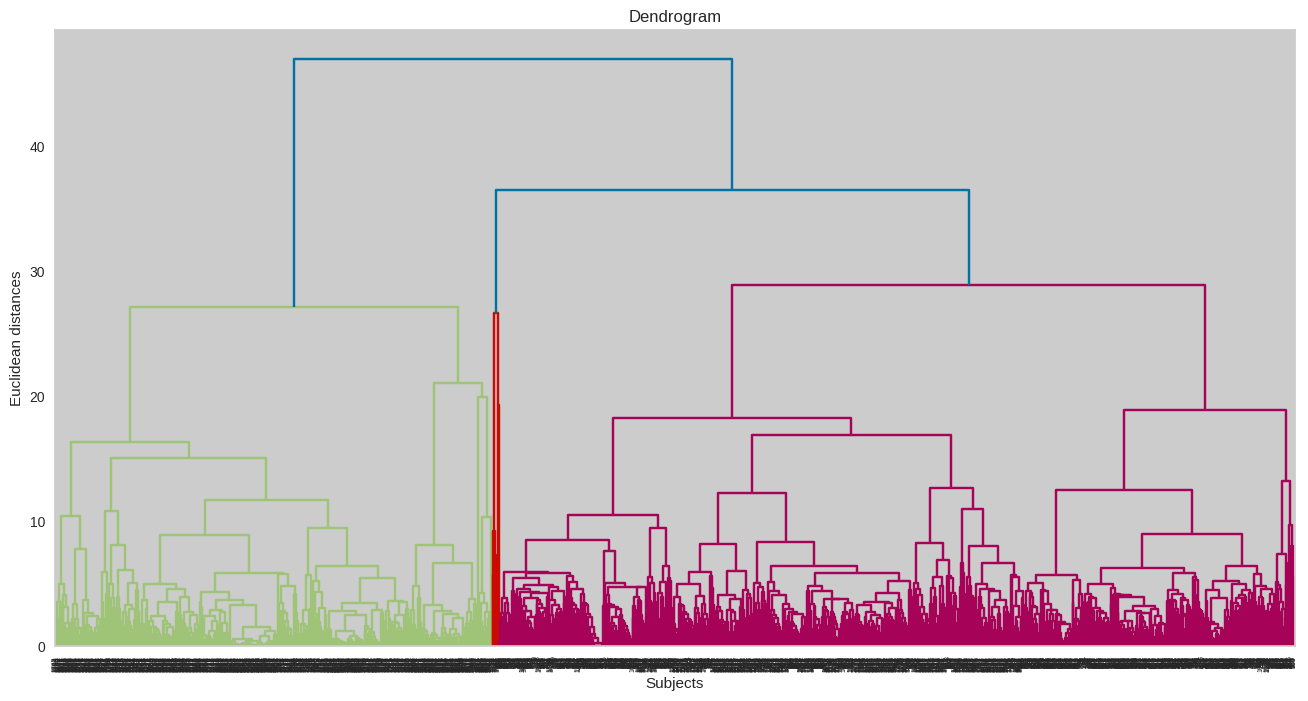

In [24]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(X_trans, method='average', metric='euclidean'))

plt.title('Dendrogram')
plt.xlabel('Subjects')
plt.ylabel('Euclidean distances')
plt.show()

In [25]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')

y_hc = hc.fit_predict(X_trans)
y_hc = pd.DataFrame(y_hc)

X_3D['cluster_hc_eu_av'] = y_kmeans

fig = px.scatter_3d(X_3D, x='PC-1', y='PC-2', z='PC-3', color='cluster_hc_eu_av')
fig.show()

**Ward & Euclidean**



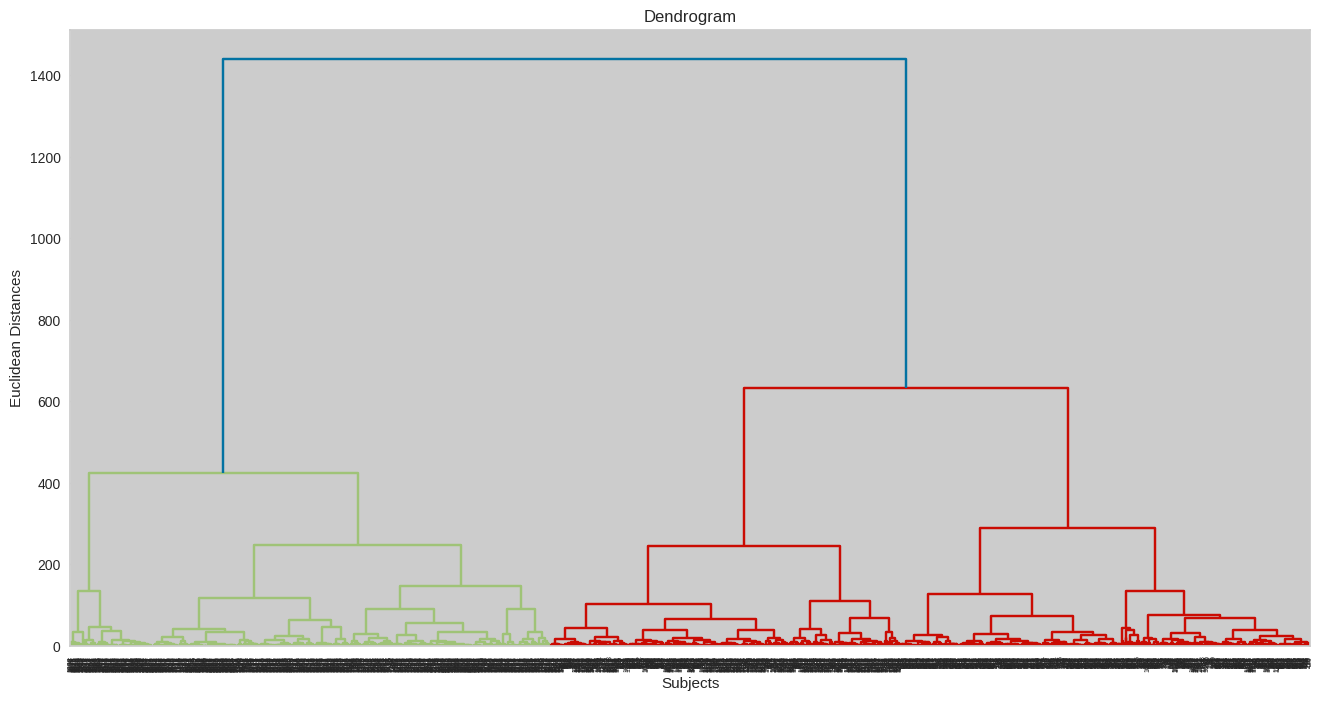

In [26]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(X_trans, method='ward', metric='euclidean'))

plt.title('Dendrogram')
plt.xlabel('Subjects')
plt.ylabel('Euclidean Distances')
plt.show()

In [27]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

y_hc = hc.fit_predict(X_trans)
y_hc = pd.DataFrame(y_hc)

X_3D['cluster_hc_eu_w'] = y_kmeans

fig = px.scatter_3d(X_3D, x='PC-1', y='PC-2', z='PC-3', color='cluster_hc_eu_w')
fig.show()

The analysis by means of dendograms and agglomerative hierarchical clustering of this daset shows that of the combinations employed the use of Ward linkage and Euclidean distances provides the clearest distinction of large cluster groups.

#**Density Clustering**

In [28]:
from sklearn.cluster import DBSCAN

y_db = DBSCAN(eps=1, min_samples=10).fit_predict(X_trans)
y_db = pd.DataFrame(y_db)

X_3D['cluster_db_1_10'] = y_db

fig = px.scatter_3d(X_3D, x='PC-1', y='PC-2', z='PC-3', color='cluster_db_1_10')
fig.show()

In [29]:
y_db = DBSCAN(eps=0.5, min_samples=5).fit_predict(X_trans)
y_db = pd.DataFrame(y_db)

X_3D['cluster_db_05_5'] = y_db

fig = px.scatter_3d(X_3D, x='PC-1', y='PC-2', z='PC-3', color='cluster_db_05_5')
fig.show()

In [37]:
from sklearn.cluster import DBSCAN

y_db = DBSCAN(eps=2, min_samples=7).fit_predict(X_trans)
y_db = pd.DataFrame(y_db)

X_3D['cluster_db_2_7'] = y_db

fig = px.scatter_3d(X_3D, x='PC-1', y='PC-2', z='PC-3', color='cluster_db_2_7')
fig.show()

In [31]:
from sklearn.cluster import DBSCAN

y_db = DBSCAN(eps=3, min_samples=7).fit_predict(X_trans)
y_db = pd.DataFrame(y_db)

X_3D['cluster_db_3_7'] = y_db

fig = px.scatter_3d(X_3D, x='PC-1', y='PC-2', z='PC-3', color='cluster_db_3_7')
fig.show()

The DBSCAN method defines the clusters by estimating the local density (no n clusters previously defined). A maximum distance ε (ε-neighborhood of the observation, eps) and a minimum number of neighbors (MinPts) are specified. In the analyzed case values of eps=3 and MinPts=7 begin to allow the distinction of clusters of different density with a sparse distribution in the 3D space created from PCA.